# Aurora – Modelling Notebook

## Objectives
- Build and evaluate a machine learning pipeline for Ames Housing Price Prediction.

## Inputs
- Dataset: data/ames.csv

## Outputs
- Trained pipeline (models/)
- Metrics & plots (assets/)


In [1]:
import os

for folder in ["data", "models", "assets"]:
    os.makedirs(folder, exist_ok=True)

print("✅ Setup complete. Folders ready.")


✅ Setup complete. Folders ready.


In [3]:
import pandas as pd

CSV_PATH = "data/ames.csv"
df = pd.read_csv(CSV_PATH)

print("✅ Data loaded:", df.shape)
df.head()

✅ Data loaded: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Target variable summary
df["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
# Missing value percentages
df.isna().mean().sort_values(ascending=False).head(15)

Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Mas Vnr Type      0.605802
Fireplace Qu      0.485324
Lot Frontage      0.167235
Garage Qual       0.054266
Garage Yr Blt     0.054266
Garage Cond       0.054266
Garage Finish     0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
Bsmt Qual         0.027304
dtype: float64

Matplotlib is building the font cache; this may take a moment.


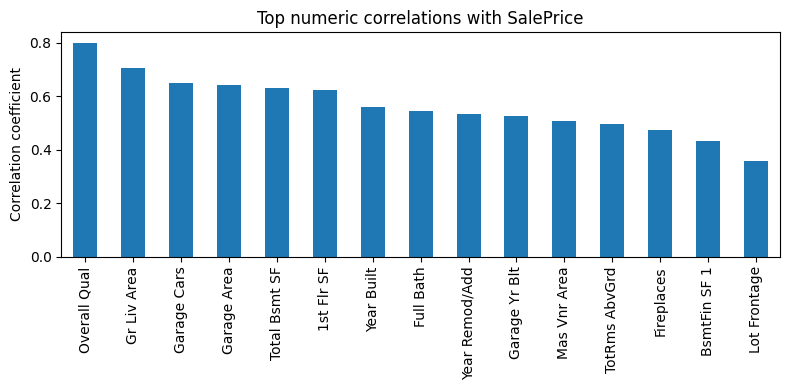

In [6]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include="number").columns.tolist()
numeric_cols.remove("SalePrice")

corr = df[numeric_cols + ["SalePrice"]].corr()["SalePrice"].drop("SalePrice").sort_values(ascending=False)

plt.figure(figsize=(8,4))
corr.head(15).plot(kind="bar")
plt.title("Top numeric correlations with SalePrice")
plt.ylabel("Correlation coefficient")
plt.tight_layout()
plt.savefig("assets/top_corr_numeric.png", dpi=150)
plt.show()
